In [4]:
# ---- Library import ----

import pickle
from time import gmtime, strftime
import math

from sklearn.metrics import balanced_accuracy_score
import albumentations
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import torchy

In [5]:
# ---- My utils ----
import sys
sys.path.insert( 0, '../..' ) # To be able to access to utils
from utils.train_arguments import *
from utils.utils_data import *
from utils.utils_training import *

In [6]:
SEED = 2

## Without DA

In [7]:
args.crop_size = math.ceil(args.crop_size * args.resolution_coefficient)
args.img_size = math.ceil(args.img_size * args.resolution_coefficient)

train_aug = albumentations.Compose([
    albumentations.PadIfNeeded(p=1, min_height=args.crop_size, min_width=args.crop_size),
    albumentations.Resize(args.img_size, args.img_size),
    albumentations.RandomCrop(p=1, height=args.crop_size, width=args.crop_size)
])

In [8]:
train_dataset = ISIC2019_FromFolders(data_partition="train", albumentation=train_aug, retinex=False)

#if args.balanced_sampler:
torch.manual_seed(SEED)
sampler_weights = get_sampler_weights()
assert len(sampler_weights)==len(train_dataset), "Weights for data balancing not correspond to dataset"
sampler = torch.utils.data.sampler.WeightedRandomSampler(sampler_weights, len(sampler_weights))
train_loader = DataLoader(train_dataset, pin_memory=True, shuffle=False, sampler=sampler, batch_size=args.batch_size)

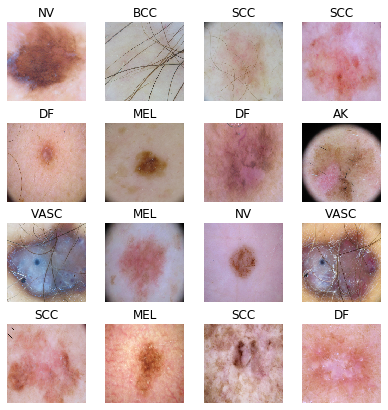

In [9]:
images, labels = next(iter(train_loader))
save_imgs(images, labels, display=True, save=False, custom_name="train_samples_withoutDA")

In [10]:
print("Max: {}".format(images.max()))
print("Min: {}".format(images.min()))
print("Mean: {}".format(images.mean()))

Max: 1.0
Min: 0.0
Mean: 0.6169304228850742


## Retinex

In [13]:
train_dataset = ISIC2019_FromFolders(data_partition="train", albumentation=train_aug, retinex=True)

#if args.balanced_sampler:
torch.manual_seed(SEED)
sampler_weights = get_sampler_weights()
assert len(sampler_weights)==len(train_dataset), "Weights for data balancing not correspond to dataset"
sampler = torch.utils.data.sampler.WeightedRandomSampler(sampler_weights, len(sampler_weights))
train_loader = DataLoader(train_dataset, pin_memory=True, shuffle=False, sampler=sampler, batch_size=args.batch_size)

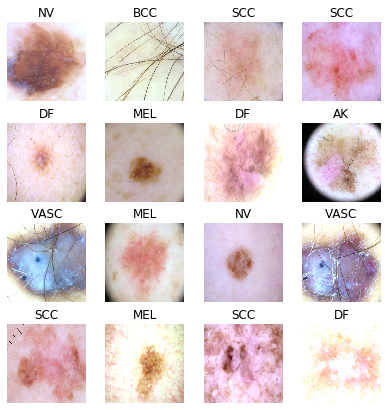

In [14]:
images, labels = next(iter(train_loader))
save_imgs(images, labels, display=True, save=False, custom_name="train_samples_withoutDA")

In [15]:
print("Max: {}".format(images.max()))
print("Min: {}".format(images.min()))
print("Mean: {}".format(images.mean()))

Max: 1.0
Min: 0.0
Mean: 0.775151154211548


## Shade of gray

In [16]:
train_dataset = ISIC2019_FromFolders(data_partition="train", albumentation=train_aug, shade_of_gray=True)

#if args.balanced_sampler:
torch.manual_seed(SEED)
sampler_weights = get_sampler_weights()
assert len(sampler_weights)==len(train_dataset), "Weights for data balancing not correspond to dataset"
sampler = torch.utils.data.sampler.WeightedRandomSampler(sampler_weights, len(sampler_weights))
train_loader = DataLoader(train_dataset, pin_memory=True, shuffle=False, sampler=sampler, batch_size=args.batch_size)

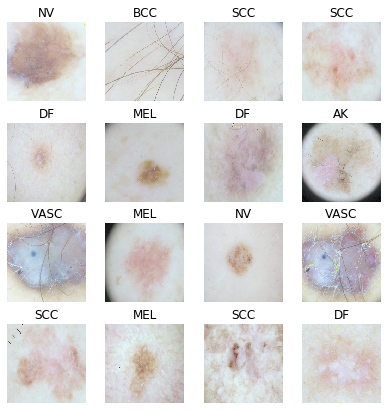

In [17]:
images, labels = next(iter(train_loader))
save_imgs(images, labels, display=True, save=False, custom_name="train_samples_withoutDA")

In [18]:
print("Max: {}".format(images.max()))
print("Min: {}".format(images.min()))
print("Mean: {}".format(images.mean()))

Max: 1.0
Min: 0.0
Mean: 0.7870568653894642


## Custom DA

In [15]:
args.crop_size = math.ceil(args.crop_size * args.resolution_coefficient)
args.img_size = math.ceil(args.img_size * args.resolution_coefficient)

train_aug = albumentations.Compose([
    albumentations.PadIfNeeded(p=1, min_height=args.crop_size, min_width=args.crop_size),
    albumentations.Resize(args.img_size, args.img_size),
    albumentations.RandomCrop(p=1, height=args.crop_size, width=args.crop_size),
    albumentations.VerticalFlip(),
    albumentations.HorizontalFlip(),
    albumentations.RandomBrightnessContrast(p=0.5, brightness_limit=0.22, contrast_limit=0.22),
    albumentations.HueSaturationValue(p=0.5, hue_shift_limit=5, sat_shift_limit=10, val_shift_limit=5),
    albumentations.ShiftScaleRotate(p=0.5, shift_limit=0.1, scale_limit=0.1, rotate_limit=45)
])

train_transforms = transforms.Compose([
    transforms.ToTensor(),
])

In [16]:
train_dataset = ISIC2019_FromFolders(data_partition="train", albumentation=train_aug, transforms=train_transforms, shade_of_gray=True)

#if args.balanced_sampler:
torch.manual_seed(SEED)
sampler_weights = get_sampler_weights()
assert len(sampler_weights)==len(train_dataset), "Weights for data balancing not correspond to dataset"
sampler = torch.utils.data.sampler.WeightedRandomSampler(sampler_weights, len(sampler_weights))
train_loader = DataLoader(train_dataset, pin_memory=True, shuffle=False, sampler=sampler, batch_size=args.batch_size)

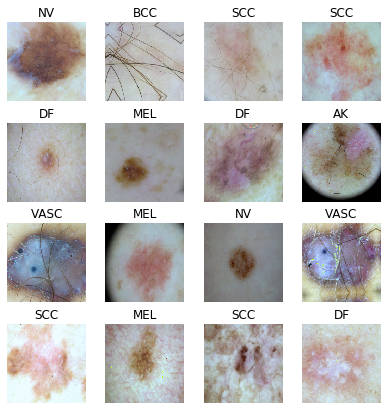

In [17]:
images, labels = next(iter(train_loader))
save_imgs(images, labels, display=True, save=False, custom_name="train_samples_withoutDA")

#### Cutout

In [ ]:
args.crop_size = math.ceil(args.crop_size * args.resolution_coefficient)
args.img_size = math.ceil(args.img_size * args.resolution_coefficient)

train_aug = albumentations.Compose([
    albumentations.PadIfNeeded(p=1, min_height=args.crop_size, min_width=args.crop_size),
    albumentations.Resize(args.img_size, args.img_size),
    albumentations.RandomCrop(p=1, height=args.crop_size, width=args.crop_size),
    albumentations.VerticalFlip(),
    albumentations.HorizontalFlip(),
    albumentations.RandomBrightnessContrast(p=0.5, brightness_limit=0.22, contrast_limit=0.22),
    albumentations.HueSaturationValue(p=0.5, hue_shift_limit=5, sat_shift_limit=10, val_shift_limit=5),
    albumentations.ShiftScaleRotate(p=0.5, shift_limit=0.1, scale_limit=0.1, rotate_limit=45),
    albumentations.Cutout(p=0.5, num_holes=1, max_h_size=50, max_w_size=50)
])

train_transforms = transforms.Compose([
    transforms.ToTensor(),
])

In [ ]:
train_dataset = ISIC2019_FromFolders(data_partition="train", albumentation=train_aug, transforms=train_transforms)

#if args.balanced_sampler:
torch.manual_seed(SEED)
sampler_weights = get_sampler_weights()
assert len(sampler_weights)==len(train_dataset), "Weights for data balancing not correspond to dataset"
sampler = torch.utils.data.sampler.WeightedRandomSampler(sampler_weights, len(sampler_weights))
train_loader = DataLoader(train_dataset, pin_memory=True, shuffle=False, sampler=sampler, batch_size=args.batch_size)

In [ ]:
images, labels = next(iter(train_loader))
save_imgs(images, labels, display=True, save=False, custom_name="train_samples_withoutDA")